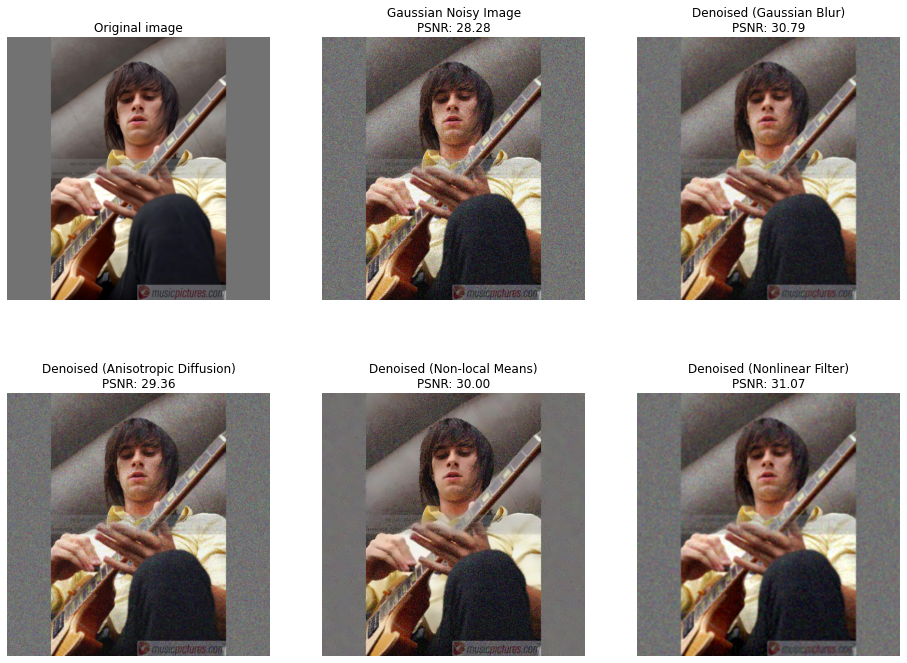

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt

def add_gaussian_noise(image, mean=0, sigma=30):
    h, w, c = image.shape
    noise = np.random.normal(mean, sigma, (h, w, c))
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)
    return noisy_image

def linear_smoothing_filter(image, kernel_size=(5, 5)):
    return cv2.GaussianBlur(image, kernel_size, 0)

def anisotropic_diffusion(image, num_iterations=10):
    return cv2.edgePreservingFilter(image, flags=cv2.RECURS_FILTER, sigma_s=60, sigma_r=0.4)

def non_local_means(image):
    return cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

def nonlinear_filter(image, kernel_size=5):
    return cv2.medianBlur(image, kernel_size)

def wavelet_transform(image):
    coeffs = pywt.dwt2(image, 'haar')
    cA, (cH, cV, cD) = coeffs
    denoised_cA = pywt.threshold(cA, np.std(cA) / 2)
    denoised_cH = pywt.threshold(cH, np.std(cH) / 2)
    denoised_cV = pywt.threshold(cV, np.std(cV) / 2)
    denoised_cD = pywt.threshold(cD, np.std(cD) / 2)
    denoised_coeffs = (denoised_cA.astype(np.uint8), (denoised_cH.astype(np.uint8), denoised_cV.astype(np.uint8), denoised_cD.astype(np.uint8)))
    denoised_image = pywt.idwt2(denoised_coeffs, 'haar').astype(np.uint8)
    return denoised_image

def calculate_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr


def main():
    # Replace 'input_image.jpg' with the path to your RGB input image
    input_image_path = r'E:\project\ComputerVision\356497855_811928863635186_1552044079980688491_n.png'
    original_image = cv2.imread(input_image_path)
    
    # Adding Gaussian noise to the original image
    gaussian_noisy_image = add_gaussian_noise(original_image)
    
    # Applying different denoising filters
    denoised_gaussian_blur = linear_smoothing_filter(gaussian_noisy_image)
    denoised_anisotropic_diffusion = anisotropic_diffusion(gaussian_noisy_image)
    denoised_non_local_means = non_local_means(gaussian_noisy_image)
    denoised_nonlinear_filter = nonlinear_filter(gaussian_noisy_image)
    
    # Calculate PSNR
    psnr_noiseimg = calculate_psnr(original_image, gaussian_noisy_image)
    psnr_gaussian_blur = calculate_psnr(original_image, denoised_gaussian_blur)
    psnr_anisotropic_diffusion = calculate_psnr(original_image, denoised_anisotropic_diffusion)
    psnr_non_local_means = calculate_psnr(original_image, denoised_non_local_means)
    psnr_nonlinear_filter = calculate_psnr(original_image, denoised_nonlinear_filter)
    
    # Plotting the images
    plt.figure(figsize=(16, 12))

    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Original image')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(cv2.cvtColor(gaussian_noisy_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Gaussian Noisy Image\nPSNR: {psnr_noiseimg:.2f}')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(cv2.cvtColor(denoised_gaussian_blur, cv2.COLOR_BGR2RGB))
    plt.title(f'Denoised (Gaussian Blur)\nPSNR: {psnr_gaussian_blur:.2f}')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.imshow(cv2.cvtColor(denoised_anisotropic_diffusion, cv2.COLOR_BGR2RGB))
    plt.title(f'Denoised (Anisotropic Diffusion)\nPSNR: {psnr_anisotropic_diffusion:.2f}')
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.imshow(cv2.cvtColor(denoised_non_local_means, cv2.COLOR_BGR2RGB))
    plt.title(f'Denoised (Non-local Means)\nPSNR: {psnr_non_local_means:.2f}')
    plt.axis('off')

    plt.subplot(2, 3, 6)
    plt.imshow(cv2.cvtColor(denoised_nonlinear_filter, cv2.COLOR_BGR2RGB))
    plt.title(f'Denoised (Nonlinear Filter)\nPSNR: {psnr_nonlinear_filter:.2f}')
    plt.axis('off')



    plt.show()

if __name__ == "__main__":
    main()


In [24]:
input_image_path = r'E:\project\ComputerVision\356497855_811928863635186_1552044079980688491_n.png'
original_image = cv2.imread(input_image_path)
calculate_psnr(original_image, original_image)

inf